In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *


fig_DIR = "../figs/teams/"
box_DIR = "../data/box/"

In [54]:
seasons = np.arange(1985,2025)
df1 = get_box("T","Base",False,seasons)
df1["pts2"] = (df1["fgm"]-df1["fg3m"])*2
df1["pts3"] = df1["fg3m"]*3

In [55]:
df2 = df1.groupby("season")[["fg3a","fga","pts2","pts3","pts"]].sum()
df2 = df2.reset_index()
df2["pts3_pct"] = df2["pts3"]/df2["pts"]
df2["pps3"] = df2["pts3"]/df2["fg3a"]
df2["pps2"] = df2["pts2"]/(df2["fga"]-df2["fg3a"])

In [56]:
data = df2.copy()

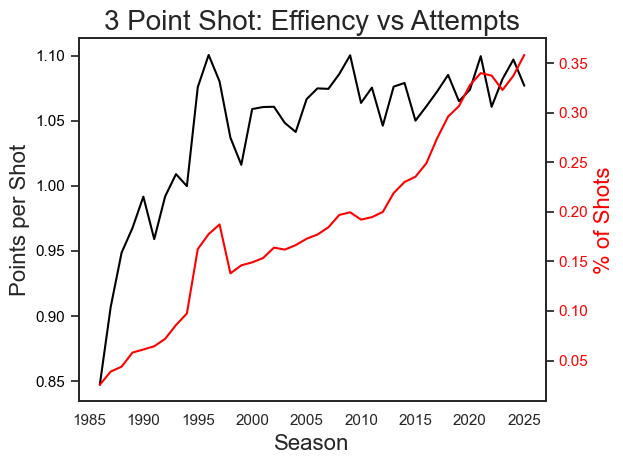

In [57]:
sns.set_style("white")
fig, ax = plt.subplots(1,1)
ax.plot(data["season"],data["pps3"],color="black")
ax.set_ylabel("Points per Shot",fontsize=16)
ax1 = ax.twinx()
ax1.plot(data["season"],data["pts3_pct"],color="red")
ax1.set_ylabel("% of Shots",fontsize=16,color="red")
ax.set_xlabel("Season",fontsize=16)
ax1.set_title("3 Point Shot: Effiency vs Attempts",fontsize=20)
ax1.tick_params(axis='y', labelcolor="red")
ax.tick_params(axis='y', labelcolor="black")
fig.tight_layout()
# grid
plt.show()